In [70]:
import glob
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ks_2samp

### importing data

In [71]:
def concat_dfs(folder_name):
    directory = r'./data/wyniki_gis_udział_luk/{}/*.csv'.format(folder_name)
    files = glob.glob(directory)
    df = []

    for f in files:   
        col_name = f.split('/')[-1].split('.')[0]
        csv = pd.read_csv(f, names = [col_name], keep_default_na=False, decimal=',')
        csv.reset_index(drop=True, inplace=True)
        df.append(csv)
    
    df2 = pd.concat(df,axis=1)
    return df2.reindex(sorted(df2.columns), axis=1)   

#### data preview

In [94]:
preview = concat_dfs('wyniki csv 10m północ')
preview.head()

,martwe_drzewa_2014,martwe_drzewa_2015,martwe_drzewa_2016,martwe_drzewa_2017,martwe_drzewa_2018,martwe_drzewa_2019,martwe_drzewa_2020,martwe_drzewa_2021,martwe_drzewa_2022,zywe_drzewa_2014,zywe_drzewa_2015,zywe_drzewa_2016,zywe_drzewa_2017,zywe_drzewa_2018,zywe_drzewa_2019,zywe_drzewa_2020,zywe_drzewa_2021,zywe_drzewa_2022
0,78.676606,59.442884,48.021276,28.601377,109.077172,37.474313,138.463302,125.823057,133.472899,35.787180,33.102046,33.355147,33.527376,32.775950,33.078457,32.772300,32.772395,32.775429
1,87.708764,69.128894,20.567383,70.361647,133.927845,50.928487,147.226695,123.968151,134.859794,21.179791,20.126245,20.231516,20.321681,19.610447,19.729468,19.720828,19.768899,19.838615
2,102.748191,6.739718,24.170321,38.096430,155.595804,79.713134,20.370342,34.409464,43.730706,27.269804,26.626030,26.598475,26.399674,26.611076,26.665738,27.116183,27.169297,27.285666
3,55.174922,69.881268,17.269816,52.921073,120.201672,68.952123,58.241321,23.365528,28.443318,95.649879,90.452817,90.550396,90.618415,90.223075,90.341930,90.196677,90.196464,90.218312
4,20.637916,49.636894,26.081831,60.323686,72.151064,89.165291,93.539515,148.814514,153.701377,102.584082,96.444875,96.515531,96.563444,96.344675,96.430678,96.321121,96.322274,96.340747


#### data preparation

In [73]:
def prepare_data(data):
    data = pd.melt(data)
    
    d_2014_2019 = data.loc[(data['variable'].isin(['martwe_drzewa_2014',
                                                            'martwe_drzewa_2015',
                                                            'martwe_drzewa_2016',
                                                            'martwe_drzewa_2017',
                                                            'martwe_drzewa_2018']))].dropna()
    d_2019_2022 = data.loc[(data['variable'].isin(['martwe_drzewa_2019',
                                                            'martwe_drzewa_2020',
                                                            'martwe_drzewa_2021',
                                                            'martwe_drzewa_2022']))].dropna()
    
    d_2014_2022 = data.loc[(data['variable'].isin(['martwe_drzewa_2014',
                                                            'martwe_drzewa_2015',
                                                            'martwe_drzewa_2016',
                                                            'martwe_drzewa_2017',
                                                            'martwe_drzewa_2018',
                                                            'martwe_drzewa_2019',
                                                            'martwe_drzewa_2020',
                                                            'martwe_drzewa_2021',
                                                            'martwe_drzewa_2022']))].dropna()
    
    s_2018 = data.loc[(data['variable'].isin(['zywe_drzewa_2018']))].dropna()
    s_2022 = data.loc[(data['variable'].isin(['zywe_drzewa_2022']))].dropna()
    
    d_2014_2019 = d_2014_2019.assign(variable='martwe 2014-2018')
    d_2019_2022 = d_2019_2022.assign(variable='martwe 2019-2022')
    d_2014_2022 = d_2014_2022.assign(variable='martwe 2014-2022')
    s_2018 = s_2018.assign(variable='żywe 2018')
    s_2022 = s_2022.assign(variable='żywe 2022')
    
    df = pd.concat([d_2014_2019, d_2019_2022, d_2014_2022, s_2018, s_2022])
    
    df['value'] = pd.to_numeric(df['value'])

    df['udział luki (%)'] = (df['value'] * 100) / ((3.14 * 10 * 10) / 2)
    
    return df

In [74]:
#north 

north_10m = prepare_data(concat_dfs('wyniki csv 10m północ'))


north_2014_2018 = (north_10m.loc[(north_10m['variable'] == 'martwe 2014-2018') |
                               (north_10m['variable'] == 'żywe 2018')]
                   .reset_index(drop = True)
                   .pivot(columns = 'variable', values = 'udział luki (%)'))

north_2019_2022 = (north_10m.loc[(north_10m['variable'] == 'martwe 2019-2022') |
                               (north_10m['variable'] == 'żywe 2022')]
                   .reset_index(drop = True)
                   .pivot(columns = 'variable', values = 'udział luki (%)'))

north_2014_2022 = (north_10m.loc[(north_10m['variable'] == 'martwe 2014-2022') |
                               (north_10m['variable'] == 'żywe 2022')]
                   .reset_index(drop = True)
                   .pivot(columns = 'variable', values = 'udział luki (%)'))

#south

south_10m = prepare_data(concat_dfs('wyniki csv 10m południe'))

south_2014_2018 = (south_10m.loc[(south_10m['variable'] == 'martwe 2014-2018') |
                               (south_10m['variable'] == 'żywe 2018')]
                   .reset_index(drop = True)
                   .pivot(columns = 'variable', values = 'udział luki (%)'))

south_2019_2022 = (south_10m
                   .loc[(south_10m['variable'] == 'martwe 2019-2022') |
                               (south_10m['variable'] == 'żywe 2022')]
                   .reset_index(drop = True)
                   .pivot(columns = 'variable', values = 'udział luki (%)'))

south_2014_2022 = (south_10m
                   .loc[(south_10m['variable'] == 'martwe 2014-2022') |
                               (south_10m['variable'] == 'żywe 2022')]
                   .reset_index(drop = True)
                   .pivot(columns = 'variable', values = 'udział luki (%)'))

In [75]:
def delete_index_name(df_list):
    for element in df_list:
        element.columns.name = None
        
delete_index_name([south_2014_2018, south_2019_2022, south_2014_2022, 
                  north_2014_2018, north_2019_2022, north_2014_2022])

### Summary chart

In [77]:
%matplotlib inline

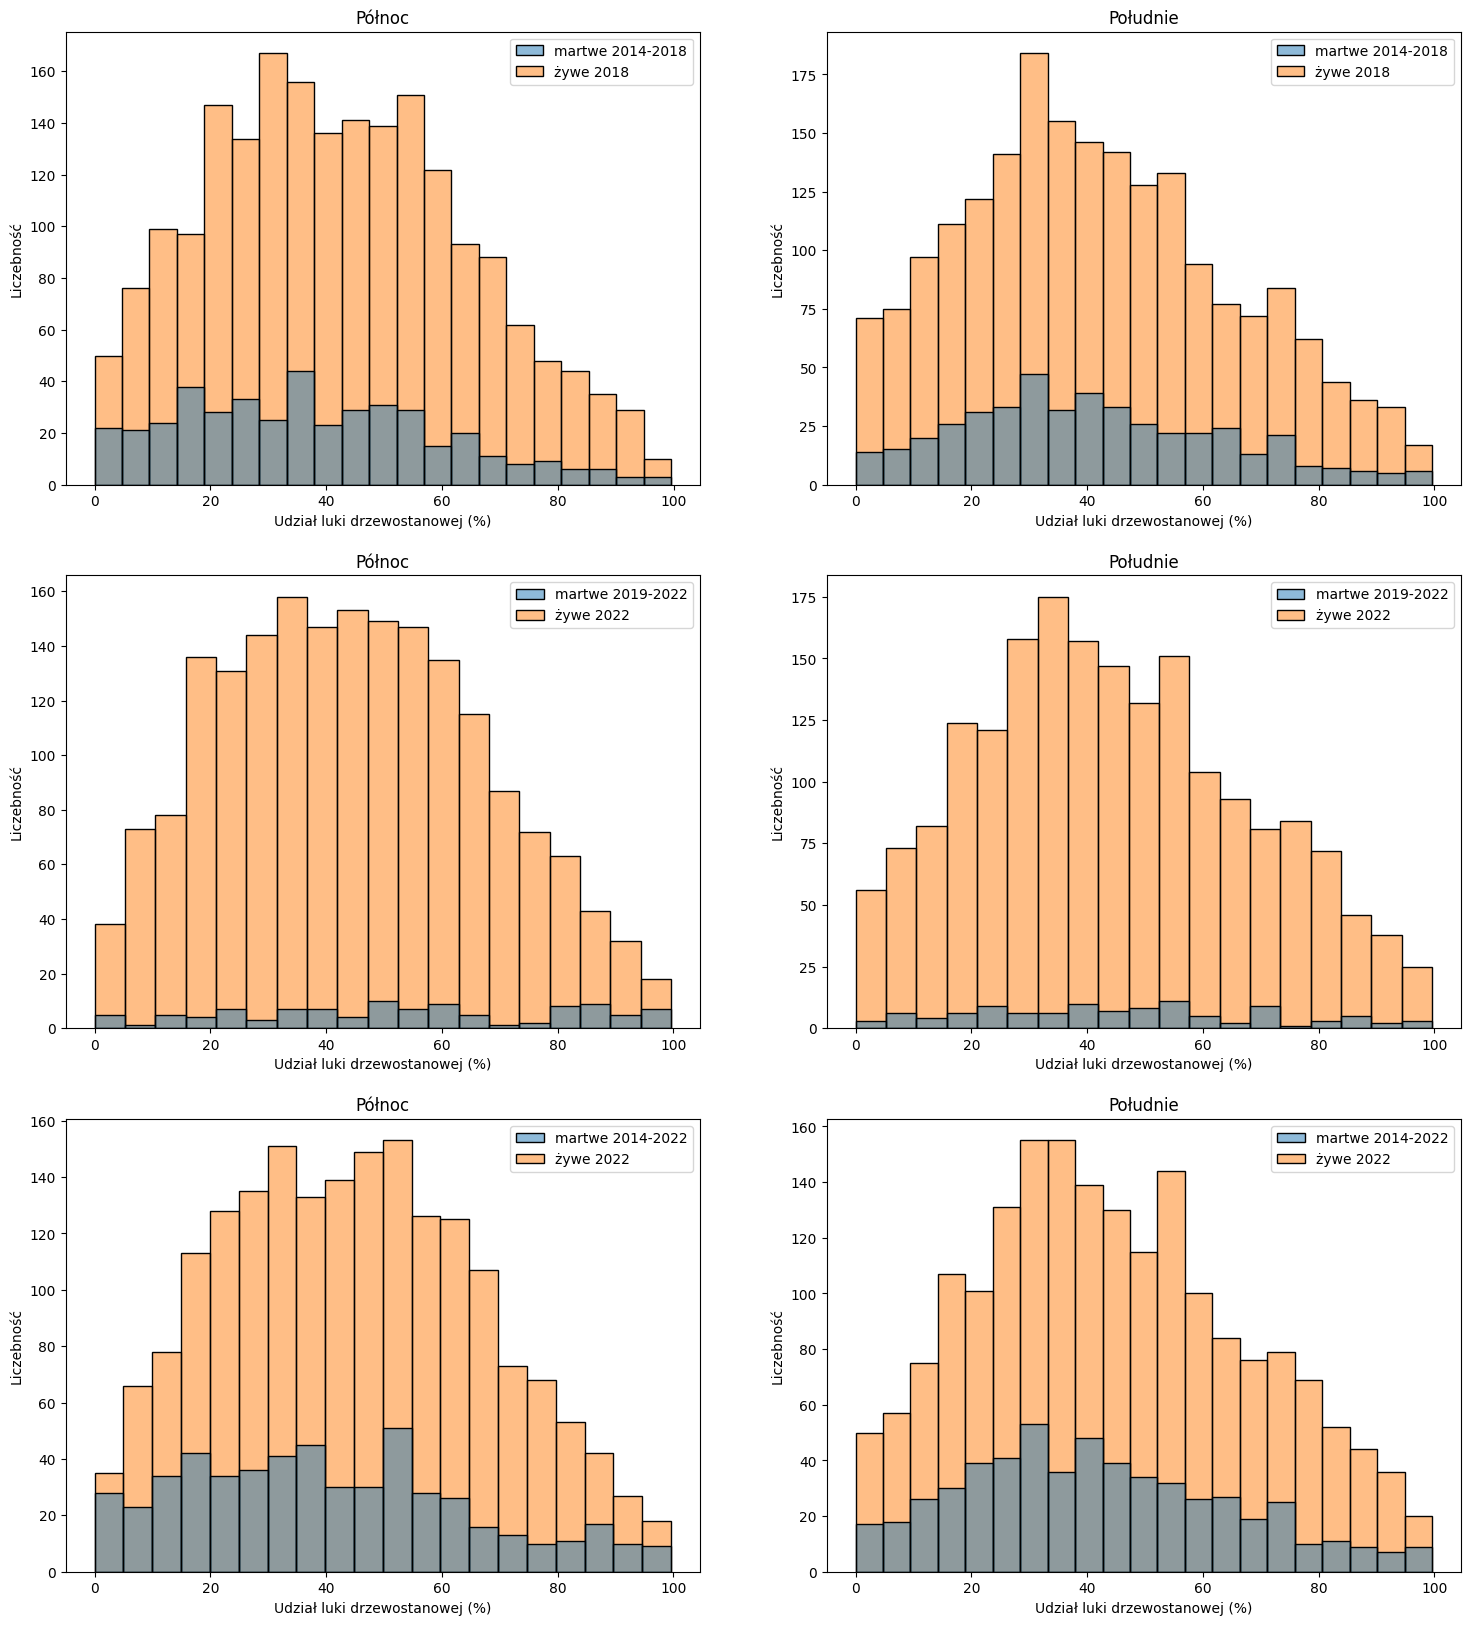

In [92]:
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(18, 20))

sns.histplot(north_2014_2018, ax=ax[0][0])
sns.histplot(south_2014_2018, ax=ax[0][1])
sns.histplot(north_2019_2022, ax=ax[1][0])
sns.histplot(south_2019_2022, ax=ax[1][1])
sns.histplot(north_2014_2022, ax=ax[2][0])
sns.histplot(south_2014_2022, ax=ax[2][1])

for i in range(0,3):
    for j in range(0,2):
        
        if j == 0:       
            ax[i][j].set_title("Północ")
        else:
            ax[i][j].set_title("Południe")

        ax[i][j].set_ylabel("Liczebność")
        ax[i][j].set_xlabel("Udział luki drzewostanowej (%)")

### statistical test

#### North

2014-2018

In [79]:
ks_2samp(north_2014_2018.iloc[:,0].dropna(), north_2014_2018.iloc[:,1].dropna())

KstestResult(statistic=0.09695799933508183, pvalue=0.0024019369450425164)

2019-2022

In [81]:
ks_2samp(north_2019_2022.iloc[:,0].dropna(), north_2019_2022.iloc[:,1].dropna())

KstestResult(statistic=0.1948980896103513, pvalue=0.0008080177886368913)

2014-2022

In [83]:
ks_2samp(north_2014_2022.iloc[:,0].dropna(), north_2014_2022.iloc[:,1].dropna())

KstestResult(statistic=0.09705527028161125, pvalue=0.0007008455860077707)

#### South

2014-2018

In [85]:
ks_2samp(south_2014_2018.iloc[:,0].dropna(), south_2014_2018.iloc[:,1].dropna())

KstestResult(statistic=0.04144049187527448, pvalue=0.5355858829007178)

2019-2022

In [87]:
ks_2samp(south_2019_2022.iloc[:,0].dropna(), south_2019_2022.iloc[:,1].dropna())

KstestResult(statistic=0.05804910183173233, pvalue=0.8665966824949629)

2014-2022

In [89]:
ks_2samp(south_2014_2022.iloc[:,0].dropna(), south_2014_2022.iloc[:,1].dropna())

KstestResult(statistic=0.06213236810239146, pvalue=0.06819979404813577)